# Project #7: Dimension Reduction

Due Friday, Nov 16th, 5pm.

1. In Project 4, you had previously used the minst digit data set to classify the images.  We would like to repeat the classification process, but this time, performing the classification using data that has been reduced.  

    1. Estimate the dimensionality of the data you wish to reduce.

    2. Experiment with how well the classification (your choice -- pick at least two) behaves with various ranked approximations.  You should pick at least three ranks to test: one that is smaller than the estimated dimensionality from (a), one that is approximately the estimated dimensionality, and lastly, the full rank approximation (i.e. as if no reduction was performed).
    
2. Consider the two data sets: "data/dataset_a.csv", "data/dataset_b.csv". The first two columns are the 2-dimensional data values, the third column is a label (either 0 or 1), that is useful for supervised learning, or dimension reduction using LDA.
    
    1. Please plot both datasets, using a different marker/color for each label, labelling the graph appropriately.
    2. Apply PCA and Fisher's Linear Discriminant Analysis to the two datasets (for PCA, ignore the class label).  Please explain the result.  In particular, be sure to address what is the projection direction of PCA and LDA on both datasets.
    
3. An approach for non-linear dimension is to explore Laplacian Eigenmaps of the data, see http://web.cse.ohio-state.edu/~belkin.8/papers/LEM_NC_03.pdf.  

    1. Read through this article, focusing on Section 1, Section 2, Section 6.1.  
    2. The code below generates and plots the classic swiss roll data set.  Construct the similarity (adjacency) graph for this data.  You can use either the $n$ nearest neighbor nodes, or pick and "$\epsilon$"-neighborhood, see page 5 of the above paper.
    3. Compute the graph Laplacian.  You should explore a few parameters (parameter $t$ on page 6 of the paper)
    4. finally, find the eigenvectors of the graph laplacian, and corresponding eigenvalues.  Project data into eigenspace, using the eigenvectors associated with the 2 smallest eigenvalues.  Plot what the data looks like in this projected space.

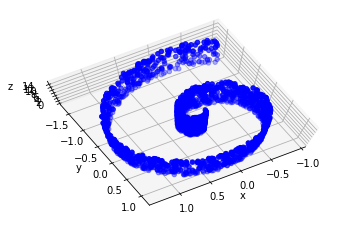

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline

# set parameters
length_phi = 10   # length of swiss roll in angular direction
length_Z = 15     # length of swiss roll in z direction
sigma = 0.1       # strength of noise
m = 2000          # number of samples

# create dataset
phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
z = length_Z*np.random.rand(m)
x = 1./6*(phi + sigma*xi)*np.sin(phi)
y = 1./6*(phi + sigma*xi)*np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c='b',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(80,60) # rotate plot 